# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [64]:
# read data
df = pd.read_csv('./Wordpress DDOS attack Logs.txt',delimiter=",")

In [65]:
df.head()

,"188.121.41.140 - - [23/Sep/2013:13:02:47 +0200] ""GET / HTTP/1.1"" 200 8955 ""-"" ""WordPress/3.0.2; http://www.cakefantasia.com"""
0,81.169.144.135 - - [23/Sep/2013:13:02:47 +0200...
1,91.184.18.50 - - [23/Sep/2013:13:02:47 +0200] ...
2,184.154.224.17 - - [23/Sep/2013:13:02:47 +0200...
3,209.15.245.58 - - [23/Sep/2013:13:02:47 +0200]...
4,66.96.183.15 - - [23/Sep/2013:13:02:47 +0200] ...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 1 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                        --------------  ----- 
 0   188.121.41.140 - - [23/Sep/2013:13:02:47 +0200] "GET / HTTP/1.1" 200 8955 "-" "WordPress/3.0.2; http://www.cakefantasia.com"  568 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


# Data Cleaning

* so first i will remove the unneccessary values and turn the log data into a dataframe
* i will also turn it into a csv file for other uses

In [67]:
#open the file 
f = open('./Wordpress DDOS attack Logs.txt', "r") 

#initialize an empty list
mylist = [] 

#iterate through each line in the file
for line in f: 
  
    #strip the newline character 
    line = line.strip() 
  
    #append the line to the list 
    mylist.append(line) 
  
#close the file
f.close()

In [68]:
import re
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
for line in mylist:
    word = str(line)
    parts = re.split(r'[\s\[\]\"]+', word)
    list1.append(parts[0])
    list2.append(parts[3])
    list3.append(parts[8:10])
    list4.append(parts[11])
    list5.append(parts[12])

In [69]:
dict = {'IP Address':list1,
        'DateAndTime':list2,
        'Port':list3,
        'Wordpress Version':list4,
        'Website': list5}
df = pd.DataFrame(dict)
display(df.head())

,IP Address,DateAndTime,Port,Wordpress Version,Website
0,188.121.41.140,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.0.2;,http://www.cakefantasia.com
1,81.169.144.135,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.6.1;,http://aifs2.pvdveen.net
2,91.184.18.50,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.5.1;,http://sociedia.com
3,184.154.224.17,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.6;,http://photekusa.com
4,209.15.245.58,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.5.2;,http://enabledkids.ca


In [70]:
# split the DateandTime Column
DateTimeSplit = df["DateAndTime"].str.split(":", n = 1, expand = True)
DateTimeSplit

,0,1
0,23/Sep/2013,13:02:47
1,23/Sep/2013,13:02:47
2,23/Sep/2013,13:02:47
3,23/Sep/2013,13:02:47
4,23/Sep/2013,13:02:47
...,...,...
564,23/Sep/2013,13:03:13
565,23/Sep/2013,13:03:13
566,23/Sep/2013,13:03:13
567,23/Sep/2013,13:03:13


* split the date and time column into date column and time column

In [71]:
df["Date"]= DateTimeSplit[0]
df["Time"]= DateTimeSplit[1]
display(df)

,IP Address,DateAndTime,Port,Wordpress Version,Website,Date,Time
0,188.121.41.140,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.0.2;,http://www.cakefantasia.com,23/Sep/2013,13:02:47
1,81.169.144.135,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.6.1;,http://aifs2.pvdveen.net,23/Sep/2013,13:02:47
2,91.184.18.50,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.5.1;,http://sociedia.com,23/Sep/2013,13:02:47
3,184.154.224.17,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.6;,http://photekusa.com,23/Sep/2013,13:02:47
4,209.15.245.58,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.5.2;,http://enabledkids.ca,23/Sep/2013,13:02:47
...,...,...,...,...,...,...,...
564,216.201.128.7,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.5;,http://www.theleadernews.com,23/Sep/2013,13:03:13
565,130.185.84.2,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.2.1;,http://www.gerirepoupar.com/jovens,23/Sep/2013,13:03:13
566,142.4.38.98,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.6;,http://caithatescake.com,23/Sep/2013,13:03:13
567,184.154.225.8,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.3.2;,http://diglitny.org/blog,23/Sep/2013,13:03:13


In [72]:
df

,IP Address,DateAndTime,Port,Wordpress Version,Website,Date,Time
0,188.121.41.140,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.0.2;,http://www.cakefantasia.com,23/Sep/2013,13:02:47
1,81.169.144.135,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.6.1;,http://aifs2.pvdveen.net,23/Sep/2013,13:02:47
2,91.184.18.50,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.5.1;,http://sociedia.com,23/Sep/2013,13:02:47
3,184.154.224.17,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.6;,http://photekusa.com,23/Sep/2013,13:02:47
4,209.15.245.58,23/Sep/2013:13:02:47,"[200, 8955]",WordPress/3.5.2;,http://enabledkids.ca,23/Sep/2013,13:02:47
...,...,...,...,...,...,...,...
564,216.201.128.7,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.5;,http://www.theleadernews.com,23/Sep/2013,13:03:13
565,130.185.84.2,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.2.1;,http://www.gerirepoupar.com/jovens,23/Sep/2013,13:03:13
566,142.4.38.98,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.6;,http://caithatescake.com,23/Sep/2013,13:03:13
567,184.154.225.8,23/Sep/2013:13:03:13,"[503, 913]",WordPress/3.3.2;,http://diglitny.org/blog,23/Sep/2013,13:03:13


In [73]:
df = df.drop('DateAndTime',axis =1)
#df['Time'] = df['Time'].dt.strftime('%H:%M:%S')
df['Time'] = pd.to_datetime(df['Time']).dt.time
df.head()

,IP Address,Port,Wordpress Version,Website,Date,Time
0,188.121.41.140,"[200, 8955]",WordPress/3.0.2;,http://www.cakefantasia.com,23/Sep/2013,13:02:47
1,81.169.144.135,"[200, 8955]",WordPress/3.6.1;,http://aifs2.pvdveen.net,23/Sep/2013,13:02:47
2,91.184.18.50,"[200, 8955]",WordPress/3.5.1;,http://sociedia.com,23/Sep/2013,13:02:47
3,184.154.224.17,"[200, 8955]",WordPress/3.6;,http://photekusa.com,23/Sep/2013,13:02:47
4,209.15.245.58,"[200, 8955]",WordPress/3.5.2;,http://enabledkids.ca,23/Sep/2013,13:02:47


* The above code completes cleaning the data
* it makes date and time different columns and deletes the original DateandTime column
* Now the code as been fully converted to a usable dataframe #### Note (help needed)
* am having troble turning it into a datetime dtype becuz it also records the date at the time of running into the dataset (to see run the comment and comment out the rest )

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IP Address         569 non-null    object
 1   Port               569 non-null    object
 2   Wordpress Version  569 non-null    object
 3   Website            569 non-null    object
 4   Date               569 non-null    object
 5   Time               569 non-null    object
dtypes: object(6)
memory usage: 26.8+ KB


In [75]:
df.to_csv('wordpress_ddos_log_transform.csv')

* The Above code turns the dataframe into a csv file
* This was How i changed the log txt to log csv

# EDA Analysis

### Import CSV data

In [76]:
df = pd.read_csv("wordpress_ddos_log_transform.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         569 non-null    int64 
 1   IP Address         569 non-null    object
 2   Port               569 non-null    object
 3   Wordpress Version  569 non-null    object
 4   Website            563 non-null    object
 5   Date               569 non-null    object
 6   Time               569 non-null    object
dtypes: int64(1), object(6)
memory usage: 31.2+ KB


### Top IP Address

In [77]:
top_ips = df['IP Address'].value_counts() >= 5
print(top_ips.sum())
print(top_ips[:7])

7
94.136.40.100      True
82.165.139.53      True
184.168.152.79     True
193.202.110.182    True
66.96.183.86       True
66.96.183.2        True
81.19.187.39       True
Name: IP Address, dtype: bool


* This are the IP addresses that contacted the server five times or more than five times
* They are about 7 in total and listed above

In [81]:
web = df['Website'].value_counts()>=5
print(web.sum())
print(web[:354])

6
http://chakra-project.es                  True
http://www.isledejeancharles.com/news     True
http://danhamilton.co.uk/blog             True
http://salaanmedia.com                    True
http://www.foamcasualty.com               True
                                         ...  
http://loganearthskiskateboards.com      False
http://www.democrasoft.com               False
http://blog.pressbooks.com               False
http://blog.transparencypolicy.net       False
http://diglitny.org/blog                 False
Name: Website, Length: 354, dtype: bool


* This are the Websites that contacted the server five times or more than five times
* They are about 354 in total and are listed above

<AxesSubplot:>

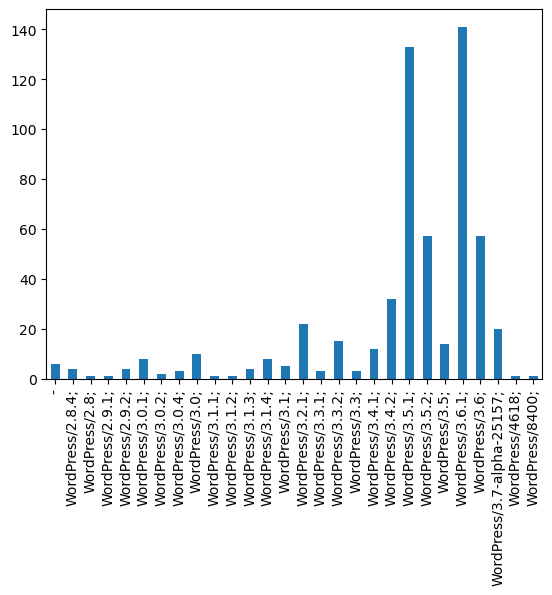

In [82]:
df['Wordpress Version'].value_counts().sort_index().plot(kind ='bar')

* This is graph of the wordpress versions frequency
* highest used version is Wordpress/3.6.1

## Port Attack

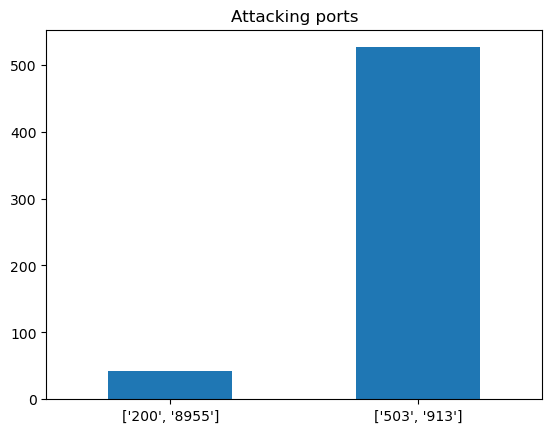

In [83]:
df['Port'].value_counts().sort_index().plot(kind ='bar', title="Attacking ports", rot=0);

In [89]:
df['Port'].value_counts().sort_index()

503       6
8955     42
913     520
Name: Port, dtype: int64

* the attacking port [913] contacted the server 520 times changing ip adresses
* the attacking port [8955] contacted the server 42 times changing ip adresses
* the attacking port [503] contacted the server 6 times changing ip adresses

## Insight

### Timing
* The attack began at 13:03:01
* it Ended at 13:03:13

### Means
*The attacker used the [503,8955,913] port/request changing the ip adress contacting the server up to 6, 42, 520 times within that timeframe respectively.
